## 1번 문제 (Confidence interval and Resamping)
iris 데이터를 아래 모델들을 사용하여 분류하고, cross validation curve함수를 사용하여 Test set의 accuracy가 가장 높은 파라미터 조합을 도출하시오.
  * GaussianNB
  * RandomForestClassifier
  * kNeighborsClassifier

* Iris dataset

```python
from sklearn.datasets import load_iris
iris = load_iris() 
```


## 1번 문제 답안

## GaussianNB

#### Iris dataset

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris() 
iris_X = iris.data
iris_y = iris.target
iris_feature_name = iris.feature_names
print('Number of targets: ',len(set(iris_y)))

pd.DataFrame(iris_X, columns=iris_feature_name).head(3)

Number of targets:  3


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


### Preprocess

#### Splitting

In [ ]:
from sklearn.model_selection import train_test_split
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_y, random_state=42)

### Set Hyperparameter(var_smoothing)

#### Visualization 함수

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name):
  plt.plot(param_range, train_mean, 
          color='blue', marker='o', 
          markersize=5, label='Training accuracy')

  plt.fill_between(param_range, train_mean + train_std,
                  train_mean - train_std, alpha=0.15,
                  color='blue')

  plt.plot(param_range, test_mean, 
          color='green', linestyle='--', 
          marker='s', markersize=5, 
          label='Validation accuracy')

  plt.fill_between(param_range, 
                  test_mean + test_std,
                  test_mean - test_std, 
                  alpha=0.15, color='green')


  plt.grid()
  plt.xscale('log')
  plt.legend(loc='lower right')
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.8, np.max(train_mean)*1.2])
  plt.tight_layout()
  plt.show()

#### Validation_curve(var_smoothing)

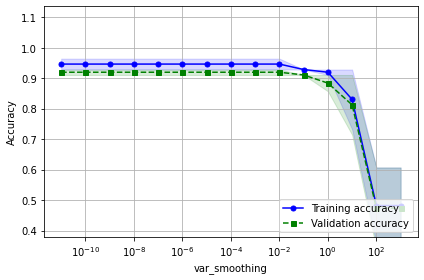

In [ ]:
from sklearn.model_selection import validation_curve
param_range= [10**i for i in range(-11,4)]
param_name='var_smoothing'

from sklearn.naive_bayes import GaussianNB

smooth_model = GaussianNB()
smooth_model.fit(iris_X_train, iris_y_train)

train_scores, test_scores = validation_curve(
                estimator=smooth_model, 
                X=iris_X_train, 
                y=iris_y_train, 
                param_name=param_name, 
                param_range=param_range,
                cv=2)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Evaluation
**Default model performance**
* Train Accuracy: 0.6310988413320207
* Test Accuracy: 0.6293088610906488

In [ ]:
from sklearn.naive_bayes import GaussianNB

proper_model = GaussianNB(var_smoothing=10**-2)
proper_model.fit(iris_X_train, iris_y_train)

from sklearn import metrics

predict = proper_model.predict(iris_X_train)
acc = metrics.accuracy_score(iris_y_train, predict)
print('Train Accuracy: {}'.format(acc))


predict = proper_model.predict(iris_X_test)
acc = metrics.accuracy_score(iris_y_test, predict)
print('Test Accuracy: {}'.format(acc))

Train Accuracy: 0.9464285714285714
Test Accuracy: 1.0


#### Result
**Best performance**
* Train Accuracy: 0.9464285714285714
* Test Accuracy: 1.0



```python
GaussianNB(var_smoothing=10**-2)
```



## kNN

### Preprocess

#### Splitting

In [ ]:
from sklearn.model_selection import train_test_split
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_y, random_state=42)

#### Scaling 
##### RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
iris_X_train_scale = scaler.fit_transform(iris_X_train)
iris_X_test_scale = scaler.transform(iris_X_test)
pd.DataFrame(iris_X_train_scale).head(3)

### Make kNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model_scaled = KNeighborsClassifier()
knn_model_scaled.fit(iris_X_train_scale, iris_y_train)

#### Evaluation
**Default model performance**
* Train Accuracy(iris): 0.8482142857142857
* Test Accuracy(iris): 0.8157894736842105

In [ ]:
from sklearn import metrics

predict = knn_model_scaled.predict(iris_X_train_scale)
acc = metrics.accuracy_score(iris_y_train, predict)
print('Train Accuracy(scale): {}'.format(acc))

predict = knn_model_scaled.predict(iris_X_test_scale)
acc = metrics.accuracy_score(iris_y_test, predict)
print('Test Accuracy(scalel): {}'.format(acc))

#### Visualization

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  
  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out

In [ ]:
plt.scatter(iris_X_test_scale[:, 0], iris_X_test_scale[:, 1], c=iris_y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k');
xx, yy = make_meshgrid(iris_X_test_scale[:, 0], iris_X_test_scale[:, 1])
plot_contours(knn_model_scaled, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

plt.xlabel(iris_feature_name[0])
plt.ylabel(iris_feature_name[1])

### Set Hyperparameter(n_neighbors, weights, algorithm, p)

#### Visualization 함수

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name):
  plt.plot(param_range, train_mean, 
          color='blue', marker='o', 
          markersize=5, label='Training accuracy')

  plt.fill_between(param_range, train_mean + train_std,
                  train_mean - train_std, alpha=0.15,
                  color='blue')

  plt.plot(param_range, test_mean, 
          color='green', linestyle='--', 
          marker='s', markersize=5, 
          label='Validation accuracy')

  plt.fill_between(param_range, 
                  test_mean + test_std,
                  test_mean - test_std, 
                  alpha=0.15, color='green')


  plt.grid()
  plt.legend(loc='lower right')
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.8, np.max(train_mean)*1.2])
  plt.tight_layout()
  plt.show()

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def viz_val_bar(param_range, train_mean, train_std, test_mean, test_std, param_name):
  idx = np.arange(len(param_range))
  plt.bar(idx, test_mean, width=0.3)
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.9, np.max(test_mean)*1.1])
  plt.xticks(idx, param_range, fontsize=15)
  plt.show()

#### Validation_curve(n_neighbors)

##### **n_neighbors**
* int, default=5
* Number of neighbors to use by default for kneighbors queries

**- sklearn.model_selection.[validation_curve(estimator, X, y, *, param_name, param_range, groups=None, cv=None, scoring=None, n_jobs=None, pre_dispatch='all', verbose=0, error_score=nan, fit_params=None)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html) : Returns Scores on training sets and Scores on test set.**

Determine training and test scores for varying parameter values.

Compute scores for an estimator with different values of a specified parameter. This is similar to grid search with one parameter. However, this will also compute training scores and is merely a utility for plotting the results.

In [ ]:
from sklearn.model_selection import validation_curve
param_range= [i for i in range(1, 51, 5)]
param_name='n_neighbors'

from sklearn.neighbors import KNeighborsClassifier

knn_model_k = KNeighborsClassifier()
knn_model_k.fit(iris_X_train_scale, iris_y_train)

train_scores, test_scores = validation_curve(
                estimator=knn_model_k, 
                X=iris_X_train_scale, 
                y=iris_y_train, 
                param_name='n_neighbors', 
                param_range=param_range,
                cv=2)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Evaluation
**Previous Best performance**
* Train Accuracy(scale): 0.7857142857142857
* Test Accuracy(scalel): 0.868421052631579

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

proper_model_k = KNeighborsClassifier(n_neighbors=25)
proper_model_k.fit(iris_X_train_scale, iris_y_train)

from sklearn import metrics

predict = proper_model_k.predict(iris_X_train_scale)
acc = metrics.accuracy_score(iris_y_train, predict)
print('Train Accuracy(n_neighbors): {}'.format(acc))

predict = proper_model_k.predict(iris_X_test_scale)
acc = metrics.accuracy_score(iris_y_test, predict)
print('Test Accuracy(n_neighbors): {}'.format(acc))

#### Validation_curve(weights)

##### **weights**
* default='uniform'
* Weight function used in prediction. 
  * 'uniform': uniform weights. All points in each neighborhood are weighted equally.
  * 'distance': weight points by the inverse of their distance
  * [callable]: a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights

In [ ]:
from sklearn.model_selection import validation_curve
param_range = ['uniform', 'distance']
param_name='weights'

from sklearn.neighbors import KNeighborsClassifier

knn_model_w = KNeighborsClassifier(n_neighbors=5)
knn_model_w.fit(iris_X_train_scale, iris_y_train)

train_scores, test_scores = validation_curve(
                estimator=knn_model_w, 
                X=iris_X_train_scale, 
                y=iris_y_train, 
                param_name='weights', 
                param_range=param_range,
                cv=2)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_bar(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Evaluation
**Previous Best performance**
* Train Accuracy(scale): 0.7857142857142857
* Test Accuracy(scalel): 0.868421052631579

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

proper_model_w = KNeighborsClassifier(n_neighbors=5, weights='uniform')
proper_model_w.fit(iris_X_train_scale, iris_y_train)

from sklearn import metrics

predict = proper_model_w.predict(iris_X_train_scale)
acc = metrics.accuracy_score(iris_y_train, predict)
print('Train Accuracy(weights): {}'.format(acc))

predict = proper_model_w.predict(iris_X_test_scale)
acc = metrics.accuracy_score(iris_y_test, predict)
print('Test Accuracy(weights): {}'.format(acc))

#### Validation_curve(p)

##### **p**
* int, default=2
* Power parameter for the Minkowski metric
  * p = 1: this is equivalent to using manhattan_distance (l1)
  * p = 2: euclidean_distance (l2)

In [ ]:
from sklearn.model_selection import validation_curve
param_range = [1, 2]
param_name='p'
from sklearn.neighbors import KNeighborsClassifier

knn_model_p = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_model_p.fit(iris_X_train_scale, iris_y_train)

train_scores, test_scores = validation_curve(
                estimator=knn_model_p, 
                X=iris_X_train_scale, 
                y=iris_y_train, 
                param_name='p', 
                param_range=param_range,
                cv=2)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_bar(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Evaluation
**Previous Best performance**
* Train Accuracy(scale): 0.7857142857142857
* Test Accuracy(scalel): 0.868421052631579

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

proper_model_p = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=1)
proper_model_p.fit(iris_X_train_scale, iris_y_train)

from sklearn import metrics

predict = proper_model_p.predict(iris_X_train_scale)
acc = metrics.accuracy_score(iris_y_train, predict)
print('Train Accuracy(p): {}'.format(acc))

predict = proper_model_p.predict(iris_X_test_scale)
acc = metrics.accuracy_score(iris_y_test, predict)
print('Test Accuracy(p): {}'.format(acc))

#### Validation_curve(algorithm)

##### **algorithm**
* default='auto'
* Algorithm used to compute the nearest neighbors
  * 'ball_tree'
  * 'kd_tree'
  * 'brute': will use a brute-force search.
  * 'auto': will attempt to decide the most appropriate algorithm based on the values passed to fit method.

In [ ]:
from sklearn.model_selection import validation_curve
param_range = ['ball_tree', 'kd_tree', 'brute', 'auto']
param_name='algorithm'

from sklearn.neighbors import KNeighborsClassifier

knn_model_a = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2)
knn_model_a.fit(iris_X_train_scale, iris_y_train)

train_scores, test_scores = validation_curve(
                estimator=knn_model_a, 
                X=iris_X_train_scale, 
                y=iris_y_train, 
                param_name='algorithm', 
                param_range=param_range,
                cv=2)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_bar(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Evaluation
**Previous Best performance**
* Train Accuracy(scale): 0.7857142857142857
* Test Accuracy(scalel): 0.868421052631579

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

proper_model_a = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2, algorithm='brute')
proper_model_a.fit(iris_X_train_scale, iris_y_train)

from sklearn import metrics

predict = proper_model_a.predict(iris_X_train_scale)
acc = metrics.accuracy_score(iris_y_train, predict)
print('Train Accuracy(algorithm): {}'.format(acc))

predict = proper_model_a.predict(iris_X_test_scale)
acc = metrics.accuracy_score(iris_y_test, predict)
print('Test Accuracy(algorithm): {}'.format(acc))

#### Result
**Best performance**
* Train Accuracy(scale): 0.7857142857142857
* Test Accuracy(scale): 0.868421052631579



```python
KNeighborsClassifier()
```



## 2번 문제

Forest CoverType index 0~9까지의 데이터를 사용하여 아래 Evaluation Metrics를 표현하시오.

* KNeighborsClassifier를 이용하여 데이터를 분류하고 confusion metrix로 결과를 도출하시오.
* DecisionTreeClassifier를 이용하여 데이터를 분류하고 Precision, Recall, F1 Score를 도출하시오.

## 2번 문제 답안

## kNN

### Setup

In [ ]:
# Common imports
import sklearn
import numpy as np

### Datasets

#### Breast cancer dataset
* The breast cancer dataset is a classic and very easy binary classification dataset.

In [ ]:
from sklearn import datasets
import pandas as pd

breast = datasets.load_breast_cancer()
breast_X = breast["data"]
breast_y = breast["target"]
breast_feature_name = breast.feature_names

pd.DataFrame(breast_X, columns=breast_feature_name).head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Splitting

In [ ]:
from sklearn.model_selection import train_test_split
breast_X_train, breast_X_test, breast_y_train, breast_y_test = train_test_split(breast_X, breast_y, random_state=42)

###Confusion Matrix




In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

pipe_knn = make_pipeline(StandardScaler(),
                         KNeighborsClassifier(n_neighbors=5))

pipe_knn.fit(breast_X_train, breast_y_train)

y_pred = pipe_knn.predict(breast_X_test)

confmat = confusion_matrix(breast_y_test, y_pred)

print(confmat)

[[51  3]
 [ 3 86]]


### Visualization

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


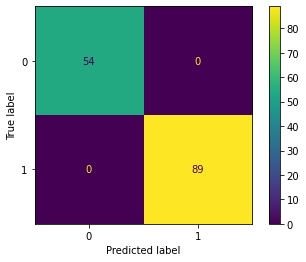

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(pipe_knn, breast_X_test, y_pred)

## DecisionTreeClassifier

### Precison, Recall, and F1 Score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, f1_score, matthews_corrcoef


print('Accuracy: %.3f' % accuracy_score(y_true=breast_y_test, y_pred=y_pred))

print('Precision: %.3f' % precision_score(y_true=breast_y_test, y_pred=y_pred))

print('Recall: %.3f' % recall_score(y_true=breast_y_test, y_pred=y_pred))

print('F1: %.3f' % f1_score(y_true=breast_y_test, y_pred=y_pred))

print('MCC: %.3f' % matthews_corrcoef(y_true=breast_y_test, y_pred=y_pred))

Accuracy: 0.944
Precision: 0.966
Recall: 0.944
F1: 0.955
MCC: 0.882
